## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

1. Carga del conjunto de datos

In [1]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [2]:
#%%capture
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()
#uploaded = files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eduflowers","key":"8cf8eb7e9d3d4d836fe29bda7df108d9"}'}

In [3]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# AHORA SI: Descarguemos un dataset de cierta competición
#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("ifigotin/imagenetmini-1000")

path = kagglehub.dataset_download("ambityga/imagenet100")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imagenet100


In [15]:
from google.colab import drive
import shutil
import os

# 1. Montar Google Drive (descomenta si es necesario)
#drive.mount('/content/drive')

# 2. Definir rutas
for i in range(1, 5):
  origen = f'/kaggle/input/imagenet100/train.X{i}'
  destino = '/content/kaggle/train'

  # 3. Copiar TODO el árbol de directorios (sobrescribiendo si existe)
  try:
      shutil.copytree(origen, destino, dirs_exist_ok=True)  # ¡Clave para evitar FileExistsError!
      print(f"¡Copia completada! Directorios copiado {origen} a {destino}")
  except Exception as e:
      print(f"Error inesperado: {str(e)}")


¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X1 a /content/kaggle/train
¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X2 a /content/kaggle/train
¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X3 a /content/kaggle/train
¡Copia completada! Directorios copiado /kaggle/input/imagenet100/train.X4 a /content/kaggle/train


In [44]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

mkdir: cannot create directory ‘my_dataset’: File exists


In [6]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/kaggle/drive/', force_remount=True)

Mounted at /content/drive


2. Inspección del conjunto de datos

/content/kaggle/train/n01440764/n01440764_10043.JPEG


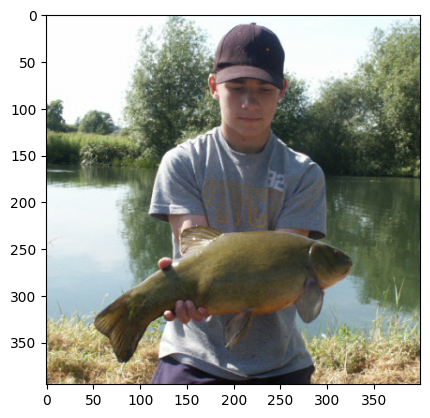

In [25]:
# Mostrar un elemento del dataset
#BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/imagenet100/train/n01440764/"
BASE_FOLDER = '/content/kaggle/train/n01440764/'
import matplotlib.pyplot as plt
import numpy as np
import cv2

#idx = np.random.randint(1, 1000)
#img = cv2.imread('test/' + str(idx) + '.jpg', cv2.COLOR_BGR2RGB)
nombre = BASE_FOLDER+'n01440764_' + '10043' + '.JPEG'
print(nombre)
img = cv2.imread(nombre, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[INFO]: Clases disponibles: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01531178', 'n01537544', 'n01560419', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01622779', 'n01630670', 'n01632458', 'n01632777', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01675722', 'n01677366', 'n01685808', 'n01687978', 'n01693334', 'n01695060', 'n01698640', 'n01728572', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01739381', 'n01740131', 'n01742172', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n01773797', 'n01774384', 'n01774750', 'n01775062', 'n01776313', 'n01795545', 'n01796340', 'n01798484', 'n01806143', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413', 'n01833805', 'n01843383', 'n01847000', 'n01855672', 'n01860187', 'n01877812', 'n01883070', 'n01910747', 'n01914609', 'n0192491

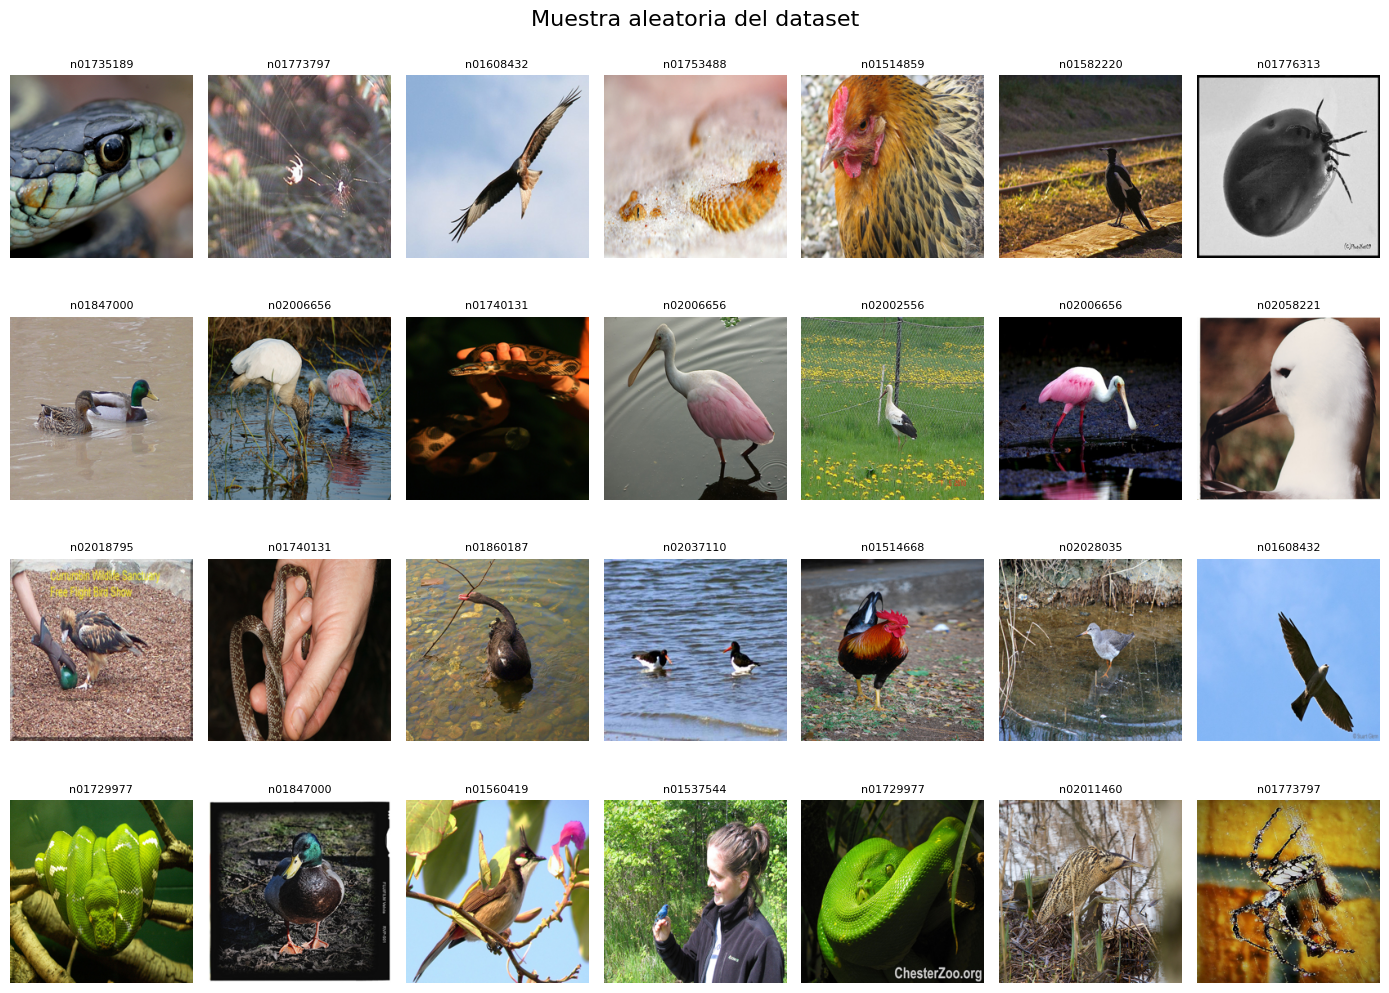

In [27]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Ruta al dataset de entrenamiento
#train_path = '/content/drive/MyDrive/Colab Notebooks/imagenet100/train'
train_path = '/content/kaggle/train'

# Obtener solo carpetas (clases) válidas
clases = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
print(f"[INFO]: Clases disponibles: {clases}")

# Preparar lista de (imagen, etiqueta)
ejemplos = []
for clase in clases:
    ruta_clase = os.path.join(train_path, clase)
    imagenes = [f for f in os.listdir(ruta_clase) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for img in imagenes:
        ejemplos.append((os.path.join(ruta_clase, img), clase))

# Seleccionar aleatoriamente 28 imágenes
muestras = random.sample(ejemplos, 28)

# Visualización tipo CIFAR-10
fig = plt.figure(figsize=(14, 10))
for i, (ruta_img, etiqueta) in enumerate(muestras):
    fig.add_subplot(4, 7, i+1)
    img = Image.open(ruta_img).resize((224, 224))
    plt.imshow(img)
    plt.title(etiqueta, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Muestra aleatoria del dataset", fontsize=16, y=1.02)
plt.show()

3. Acondicionamiento del conjunto de datos

In [40]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.regularizers import l2
from sklearn.utils import class_weight
import numpy as np
import os

## ---------------------------
## 1. Configuración inicial
## ---------------------------

# Parámetros
IMG_SIZE = (224, 224)
BATCH_SIZE = 1024  # Aumentar según memoria GPU
EPOCHS_TRANSFER = 10
EPOCHS_FINE_TUNE = 10
INIT_LR = 1e-4
FINE_TUNE_LR = 1e-5

dataset_train = '/content/kaggle/train'
dataset_val = '/kaggle/input/imagenet100/val.X'


4. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución

In [46]:
## ---------------------------
## 2. Preprocesamiento y Data Augmentation
## ---------------------------

# Preprocesamiento específico para ResNet50
def preprocess_input(x):
    return tf.keras.applications.resnet50.preprocess_input(x)

# Aumentación de datos para entrenamiento
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Generador de validación (solo preprocesamiento)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    dataset_train,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    dataset_val,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Verificación
num_classes = train_generator.num_classes
print(f"Número de clases detectadas: {num_classes}")
print(f"Mapping de clases: {train_generator.class_indices}")

# Balanceo de clases (opcional)
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

## ---------------------------
## 3. Construcción del Modelo
## ---------------------------

# Cargar modelo base preentrenado
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)
base_model.trainable = False  # Congelar inicialmente

# Construir modelo personalizado
inputs = tf.keras.Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

## ---------------------------
## 4. Compilación y Callbacks
## ---------------------------

# Optimizador con learning rate configurable
optimizer = optimizers.Adam(learning_rate=INIT_LR)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

# Callbacks mejorados
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    ),
    ModelCheckpoint(
        'best_model_resnet50.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    ),
    TensorBoard(
        log_dir='./logs',
        histogram_freq=1
    )
]


Found 130000 images belonging to 100 classes.
Found 5000 images belonging to 100 classes.
Número de clases detectadas: 100
Mapping de clases: {'n01440764': 0, 'n01443537': 1, 'n01484850': 2, 'n01491361': 3, 'n01494475': 4, 'n01496331': 5, 'n01498041': 6, 'n01514668': 7, 'n01514859': 8, 'n01531178': 9, 'n01537544': 10, 'n01560419': 11, 'n01582220': 12, 'n01592084': 13, 'n01601694': 14, 'n01608432': 15, 'n01614925': 16, 'n01622779': 17, 'n01630670': 18, 'n01632458': 19, 'n01632777': 20, 'n01644900': 21, 'n01664065': 22, 'n01665541': 23, 'n01667114': 24, 'n01667778': 25, 'n01675722': 26, 'n01677366': 27, 'n01685808': 28, 'n01687978': 29, 'n01693334': 30, 'n01695060': 31, 'n01698640': 32, 'n01728572': 33, 'n01729322': 34, 'n01729977': 35, 'n01734418': 36, 'n01735189': 37, 'n01739381': 38, 'n01740131': 39, 'n01742172': 40, 'n01749939': 41, 'n01751748': 42, 'n01753488': 43, 'n01755581': 44, 'n01756291': 45, 'n01770081': 46, 'n01770393': 47, 'n01773157': 48, 'n01773549': 49, 'n01773797': 50, 

5. Monitorización del proceso de entrenamiento para la toma de decisiones

In [42]:
## ---------------------------
## 5. Entrenamiento en Dos Fases
## ---------------------------

print("\n--- Fase 1: Transfer Learning ---")
history = model.fit(
    train_generator,
    epochs=EPOCHS_TRANSFER,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weights,  # Opcional para datasets desbalanceados
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator))

'final_model_resnet50.h5'
base_model.save('final_model_resnet50.h5')
print("✅ Modelo afinado guardado como 'final_model_resnet50.h5'.")




--- Fase 1: Transfer Learning ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.0890 - loss: 5.5402 - top_k_categorical_accuracy: 0.2240 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1972s 15s/step - accuracy: 0.0899 - loss: 5.5347 - top_k_categorical_accuracy: 0.2255 - val_accuracy: 0.6550 - val_loss: 3.2824 - val_top_k_categorical_accuracy: 0.8704 - learning_rate: 1.0000e-04
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.4982 - loss: 3.3540 - top_k_categorical_accuracy: 0.7680 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1935s 15s/step - accuracy: 0.4986 - loss: 3.3521 - top_k_categorical_accuracy: 0.7683 - val_accuracy: 0.7350 - val_loss: 2.3029 - val_top_k_categorical_accuracy: 0.9252 - learning_rate: 1.0000e-04
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.6310 - loss: 2.6014 - top_k_categorical_accuracy: 0.8734 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1940s 15s/step - accuracy: 0.6311 - loss: 2.6006 - top_k_categorical_accuracy: 0.8735 - val_accuracy: 0.7564 - val_loss: 2.0146 - val_top_k_categorical_accuracy: 0.9386 - learning_rate: 1.0000e-04
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.6836 - loss: 2.2761 - top_k_categorical_accuracy: 0.9064 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1942s 15s/step - accuracy: 0.6837 - loss: 2.2756 - top_k_categorical_accuracy: 0.9065 - val_accuracy: 0.7674 - val_loss: 1.8759 - val_top_k_categorical_accuracy: 0.9440 - learning_rate: 1.0000e-04
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7168 - loss: 2.0727 - top_k_categorical_accuracy: 0.9224 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1948s 15s/step - accuracy: 0.7168 - loss: 2.0725 - top_k_categorical_accuracy: 0.9224 - val_accuracy: 0.7782 - val_loss: 1.7811 - val_top_k_categorical_accuracy: 0.9466 - learning_rate: 1.0000e-04
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7326 - loss: 1.9482 - top_k_categorical_accuracy: 0.9314 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1944s 15s/step - accuracy: 0.7327 - loss: 1.9480 - top_k_categorical_accuracy: 0.9314 - val_accuracy: 0.7866 - val_loss: 1.7070 - val_top_k_categorical_accuracy: 0.9490 - learning_rate: 1.0000e-04
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7477 - loss: 1.8403 - top_k_categorical_accuracy: 0.9393 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1941s 15s/step - accuracy: 0.7477 - loss: 1.8401 - top_k_categorical_accuracy: 0.9392 - val_accuracy: 0.7910 - val_loss: 1.6445 - val_top_k_categorical_accuracy: 0.9482 - learning_rate: 1.0000e-04
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7579 - loss: 1.7575 - top_k_categorical_accuracy: 0.9415 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1952s 15s/step - accuracy: 0.7579 - loss: 1.7574 - top_k_categorical_accuracy: 0.9415 - val_accuracy: 0.7916 - val_loss: 1.5842 - val_top_k_categorical_accuracy: 0.9504 - learning_rate: 1.0000e-04
Epoch 9/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7655 - loss: 1.6825 - top_k_categorical_accuracy: 0.9448 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1948s 15s/step - accuracy: 0.7655 - loss: 1.6824 - top_k_categorical_accuracy: 0.9448 - val_accuracy: 0.7988 - val_loss: 1.5351 - val_top_k_categorical_accuracy: 0.9506 - learning_rate: 1.0000e-04
Epoch 10/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1949s 15s/step - accuracy: 0.7770 - loss: 1.5989 - top_k_categorical_accuracy: 0.9511 - val_accuracy: 0.7988 - val_loss: 1.4898 - val_top_k_categorical_accuracy: 0.9526 - learning_rate: 1.0000e-04


✅ Modelo afinado guardado como 'final_model_resnet50.h5'.


Aplicando Fine-Tuning

In [43]:
# Fase 2: Fine-Tuning
print("\n--- Fase 2: Fine-Tuning ---")
base_model.trainable = True
for layer in base_model.layers[:100]:  # Descongelar solo capas superiores
    layer.trainable = False

model.compile(
    optimizer=optimizers.Adam(learning_rate=FINE_TUNE_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_generator,
    epochs=EPOCHS_TRANSFER + EPOCHS_FINE_TUNE,
    initial_epoch=history.epoch[-1] + 1,
    validation_data=val_generator,
    callbacks=callbacks,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator))

# ==========================
# Guardar modelo fine-tuning
# ==========================
base_model.save('final_resnet50_finetuned.h5')
print("✅ Modelo afinado guardado como 'final_resnet50_finetuned.h5'.")



--- Fase 2: Fine-Tuning ---
Epoch 11/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7716 - loss: 1.6265 

127/127 ━━━━━━━━━━━━━━━━━━━━ 2002s 15s/step - accuracy: 0.7716 - loss: 1.6262 - val_accuracy: 0.8038 - val_loss: 1.5038 - learning_rate: 1.0000e-05
Epoch 12/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7993 - loss: 1.5094 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1949s 15s/step - accuracy: 0.7993 - loss: 1.5093 - val_accuracy: 0.8062 - val_loss: 1.4784 - learning_rate: 1.0000e-05
Epoch 13/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8092 - loss: 1.4657 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1951s 15s/step - accuracy: 0.8093 - loss: 1.4656 - val_accuracy: 0.8098 - val_loss: 1.4637 - learning_rate: 1.0000e-05
Epoch 14/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8212 - loss: 1.4168 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1951s 15s/step - accuracy: 0.8212 - loss: 1.4168 - val_accuracy: 0.8122 - val_loss: 1.4454 - learning_rate: 1.0000e-05
Epoch 15/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8293 - loss: 1.3919 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1947s 15s/step - accuracy: 0.8293 - loss: 1.3919 - val_accuracy: 0.8174 - val_loss: 1.4321 - learning_rate: 1.0000e-05
Epoch 16/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8341 - loss: 1.3618 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1943s 15s/step - accuracy: 0.8341 - loss: 1.3618 - val_accuracy: 0.8198 - val_loss: 1.4254 - learning_rate: 1.0000e-05
Epoch 17/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8417 - loss: 1.3365 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1953s 15s/step - accuracy: 0.8417 - loss: 1.3365 - val_accuracy: 0.8216 - val_loss: 1.4125 - learning_rate: 1.0000e-05
Epoch 18/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8460 - loss: 1.3147 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1952s 15s/step - accuracy: 0.8460 - loss: 1.3147 - val_accuracy: 0.8254 - val_loss: 1.4035 - learning_rate: 1.0000e-05
Epoch 19/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1948s 15s/step - accuracy: 0.8507 - loss: 1.2913 - val_accuracy: 0.8236 - val_loss: 1.4013 - learning_rate: 1.0000e-05
Epoch 20/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.8555 - loss: 1.2727 

127/127 ━━━━━━━━━━━━━━━━━━━━ 1956s 15s/step - accuracy: 0.8555 - loss: 1.2727 - val_accuracy: 0.8274 - val_loss: 1.3875 - learning_rate: 1.0000e-05


✅ Modelo afinado guardado como 'final_resnet50_finetuned.h5'.


6. Evaluación del modelo predictivo


Evaluación en conjunto de validación:
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.8181 - loss: 1.4089
Accuracy: 0.8274
Top-5 Accuracy: 0.8274


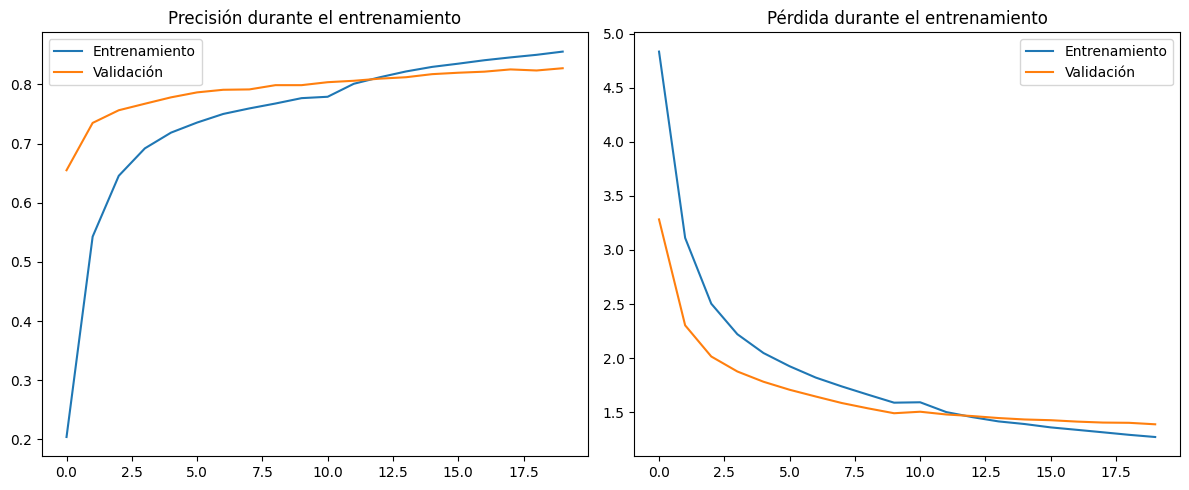

In [49]:
## ---------------------------
## 6. Evaluación Final
## ---------------------------

# Cargar el mejor modelo guardado
best_model = tf.keras.models.load_model('best_model_resnet50.h5')

# Evaluación cuantitativa
print("\nEvaluación en conjunto de validación:")
#val_loss, val_acc, val_top5 = best_model.evaluate(val_generator)
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"Accuracy: {val_acc:.4f}")
print(f"Top-5 Accuracy: {val_top5:.4f}")

# Visualización de resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Precisión durante el entrenamiento')
plt.legend(['Entrenamiento', 'Validación'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Pérdida durante el entrenamiento')
plt.legend(['Entrenamiento', 'Validación'])

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [50]:
# Copiando archivos finales
from google.colab import drive
import shutil
import os

# copiando archivos finales

origen = '/content/final_resnet50_model.h5'
destino = '/content/drive/MyDrive/Colab Notebooks'
try:
  shutil.copy(origen, destino)
  print(f"¡Copia completada! {origen} a: {destino}")
except Exception as e:
    print(f"Error inesperado: {str(e)}")

origen = '/content/final_resnet50_finetuned.h5'
destino = '/content/drive/MyDrive/Colab Notebooks'
try:
  shutil.copy(origen, destino)
  print(f"¡Copia completada! {origen} a: {destino}")
except Exception as e:
  print(f"Error inesperado: {str(e)}")


¡Copia completada! /content/final_resnet50_model.h5 a: /content/drive/MyDrive/Colab Notebooks
¡Copia completada! /content/final_resnet50_finetuned.h5 a: /content/drive/MyDrive/Colab Notebooks
